In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import folium
import imageio
from tqdm import tqdm_notebook
from folium.plugins import MarkerCluster
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs

import mapclassify as mc
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import scipy
from itertools import product
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 
          'xkcd:sea blue', 
          'xkcd:pale red', 
          'xkcd:sage green', 
          'xkcd:terra cotta', 
          'xkcd:dull purple', 
          'xkcd:teal', 
          'xkcd: goldenrod', 
          'xkcd:cadet blue',
          'xkcd:scarlet']

In [3]:
data = pd.read_csv('prismc-tmax-daily-40_-120.csv')

In [4]:
data.head()

,date,value
0,1981-01-01,55.08 deg_F
1,1981-01-02,51.48 deg_F
2,1981-01-03,51.87 deg_F
3,1981-01-04,45.09 deg_F
4,1981-01-05,48.72 deg_F


In [5]:
data.index

RangeIndex(start=0, stop=15076, step=1)

In [6]:
#Remove " deg_F"s from value strings
data['value'] = data['value'].apply(lambda x: x.rstrip(" deg_F"))
data.head()

,date,value
0,1981-01-01,55.08
1,1981-01-02,51.48
2,1981-01-03,51.87
3,1981-01-04,45.09
4,1981-01-05,48.72


In [7]:
data = data.rename(columns = {'date' : 'Date', 'value' : "Deg F"})
data.head()

,Date,Deg F
0,1981-01-01,55.08
1,1981-01-02,51.48
2,1981-01-03,51.87
3,1981-01-04,45.09
4,1981-01-05,48.72


In [8]:
type(data['Deg F'][0])

str

In [9]:
data['Date'][0]

'1981-01-01'

In [10]:
#convert temperature observation values to floats
data['Deg F'] = data['Deg F'].astype(float)
data.head()

,Date,Deg F
0,1981-01-01,55.08
1,1981-01-02,51.48
2,1981-01-03,51.87
3,1981-01-04,45.09
4,1981-01-05,48.72


In [11]:
type(data['Deg F'][0])

numpy.float64

In [12]:
last = len(data['Deg F'])
type(data['Deg F'][last-1])

numpy.float64

In [13]:
min(data['Deg F'])

11.13

In [14]:
#data['Moving Avg'] = data['Deg F']
#data.head()

In [15]:
#Check date values dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15076 entries, 0 to 15075
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    15076 non-null  object 
 1   Deg F   15076 non-null  float64
dtypes: float64(1), object(1)
memory usage: 235.7+ KB


In [16]:
#convert Date values to dto's
data['Date'] = data['Date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
data.info()

#chicago_data.dt = pd.to_datetime(chicago_data.dt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15076 entries, 0 to 15075
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    15076 non-null  datetime64[ns]
 1   Deg F   15076 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 235.7 KB


In [17]:
YEAR = []
MONTH = []
DAY = []
WEEKDAY = []
for i in range(len(data.Date)):
    WEEKDAY.append(data.Date[i].weekday())
    DAY.append(data.Date[i].day)
    MONTH.append(data.Date[i].month)
    YEAR.append(data.Date[i].year)

In [18]:
data['Year'] = YEAR
data['Month'] = MONTH
data['Day'] = DAY 
data['Weekday'] = WEEKDAY

In [19]:
change_year_index = []
change_year = []
year_list = data['Year'].tolist()
for y in range(0,len(year_list)-1):
    if year_list[y]!=year_list[y+1]:
        change_year.append(year_list[y+1])
        change_year_index.append(y+1)

In [20]:
x_ticks_year_list=np.linspace(min(year_list),max(year_list),20).astype(int)
change_year_index = np.array(change_year_index)
x_ticks_year_index = []
for i in range(1,len(x_ticks_year_list)):
    x_ticks_year_index.append(change_year_index[np.where(np.array(change_year)==x_ticks_year_list[i])][0])

ValueError: The number of FixedLocator locations (19), usually from a call to set_ticks, does not match the number of ticklabels (20).

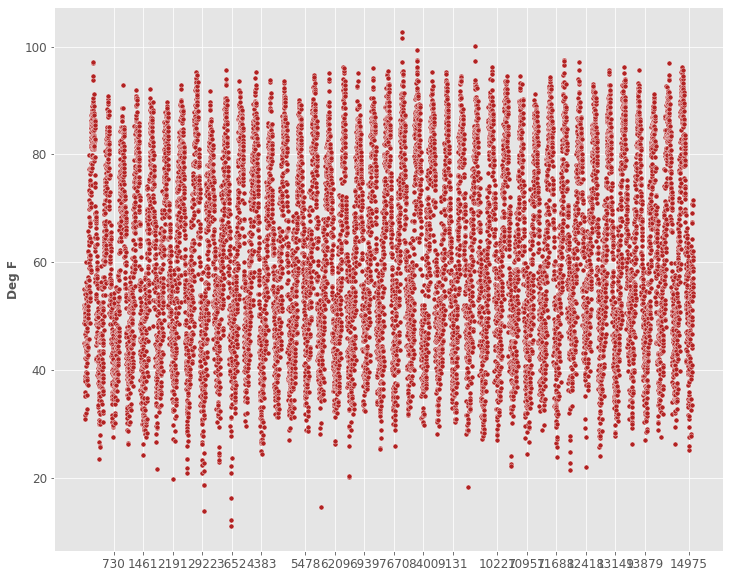

In [21]:
sns.scatterplot(x=data.index,y=data['Deg F'],s=25,color='firebrick')
plt.xticks(x_ticks_year_index,x_ticks_year_list)
plt.title('Temperature vs Year Scatter plot',color='firebrick',fontsize=40)
plt.xlabel('Year')
plt.ylabel('Max Temperature')

In [22]:
len(data['Deg F'])

15076

In [23]:
#add calculated uncertainty values
#First put average in variable for same

total = 0

for x in range(len(data['Deg F'])):
    total = total + data['Deg F'][x]

average_max_temp = total/len(data['Deg F'])
average_max_temp

61.32634319448107

In [24]:
data['distance_avg'] = ( data['Deg F'] - average_max_temp )
data.head()

,Date,Deg F,Year,Month,Day,Weekday,distance_avg
0,1981-01-01,55.08,1981,1,1,3,-6.246343
1,1981-01-02,51.48,1981,1,2,4,-9.846343
2,1981-01-03,51.87,1981,1,3,5,-9.456343
3,1981-01-04,45.09,1981,1,4,6,-16.236343
4,1981-01-05,48.72,1981,1,5,0,-12.606343


In [25]:
sum_sqrs = 0
for x in range(len(data['distance_avg'])):
    sum_sqrs = sum_sqrs + (x^2)

variance = ( sum_sqrs / len(data['distance_avg']) )
#std_dev = 

sum_sqrs, variance

(113635350, 7537.5)

In [26]:
std_dev = data['Deg F'].std()
std_dev

17.518544068745495

In [27]:
data['Deg F'].describe()

count    15076.000000
mean        61.326343
std         17.518544
min         11.130000
25%         46.790000
50%         59.820000
75%         77.210000
max        102.710000
Name: Deg F, dtype: float64

In [28]:
#AD Fuller Test - full sample data
result = adfuller(data['Deg F'])
print('ADF Statistic on the temp var: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the temp var: -9.189001070353388
p-value: 2.1486042570347297e-15
Critical Values:
	1%: -3.4307850995899374
	5%: -2.8617322952263824
	10%: -2.566872354102449


In [29]:
data.iloc[6939]
#3287

Date            2000-01-01 00:00:00
Deg F                         50.02
Year                           2000
Month                             1
Day                               1
Weekday                           5
distance_avg             -11.306343
Name: 6939, dtype: object

In [30]:
#Looking at just the 1990s
result_90s = adfuller(data['Deg F'][3287:6938])

print('ADF Statistic on the temp var: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the temp var: -9.189001070353388
p-value: 2.1486042570347297e-15
Critical Values:
	1%: -3.4307850995899374
	5%: -2.8617322952263824
	10%: -2.566872354102449


In [31]:
# Our data seems to be stationary. 
# So I don't know what to do here because the example I'm working from determines their data is 
# non-stationary when lookint at splices of their data (they look at a decade, for instance)

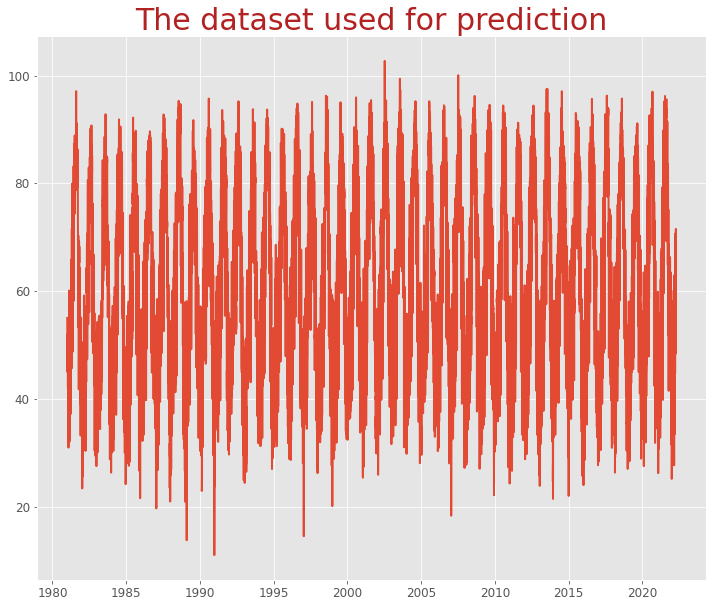

In [32]:
plt.title('The dataset used for prediction', fontsize=30, color='firebrick')
plt.plot(data['Date'], data['Deg F'])

### Performing the train/test split:


In [33]:
temp = data['Deg F']
N = len(data['Deg F'])
split = 0.95
training_size = round(split*N)
test_size = round((1-split)*N)
series = data['Deg F'][:training_size]
date = data['Date'][:training_size]
test_series = data['Deg F'][len(date)-1:len(temp)]
test_date = data['Date'][len(date)-1:len(temp)]
#test_date = test_date.reset_index().dt
#test_series = test_series.reset_index().AverageTemperature

In [34]:
#plot_from_data(series,date,label='Training Set')
#plot_from_data(test_series,test_date,'navy',with_ticks=False,label='Test Set')
#plt.legend()

In [35]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        #try: 
        model = SARIMAX(exog, order=order).fit(disp=-1)
    #except:
    #        continue
            
        aic = model.aic
        results.append([order, model.aic])
    #print(results)
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

### Zero-differentiated ARIMA models - (using AIC)

In [36]:
ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = series)

/var/folders/k1/btj9rqj50h33wypkg41zpbkm0000gn/T/ipykernel_30523/912339691.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Chec

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

In [37]:
result_d_0.head()

,"(p, d, q)",AIC
0,"(3, 0, 8)",89124.804980
1,"(6, 0, 3)",89125.854427
2,"(3, 0, 3)",89126.577651
3,"(4, 0, 8)",89127.179988
4,"(3, 0, 9)",89127.265379


### First differentiated models

In [38]:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_1 = optimize_ARIMA(order_list, exog = series)

result_d_1

/var/folders/k1/btj9rqj50h33wypkg41zpbkm0000gn/T/ipykernel_30523/912339691.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

,"(p, d, q)",AIC
0,"(2, 1, 8)",89113.876380
1,"(5, 1, 3)",89114.899109
2,"(2, 1, 9)",89115.685578
3,"(3, 1, 8)",89116.767446
4,"(7, 1, 9)",89116.926358
...,...,...
95,"(2, 1, 0)",90042.345398
96,"(1, 1, 1)",90530.967456
97,"(0, 1, 1)",90673.289652
98,"(1, 1, 0)",90731.421033


In [39]:
result_d_1.head()

,"(p, d, q)",AIC
0,"(2, 1, 8)",89113.876380
1,"(5, 1, 3)",89114.899109
2,"(2, 1, 9)",89115.685578
3,"(3, 1, 8)",89116.767446
4,"(7, 1, 9)",89116.926358


The total summary is highlighted with this function and it shows that the (2,1,8) model and the (5,1,3) model 
are the best ones.


In [40]:
final_result = result_d_0.append(result_d_1)

In [41]:
best_models = final_result.sort_values(by='AIC', ascending=True).reset_index(drop=True).head()

In [42]:
best_models.head()

,"(p, d, q)",AIC
0,"(2, 1, 8)",89113.876380
1,"(5, 1, 3)",89114.899109
2,"(2, 1, 9)",89115.685578
3,"(3, 1, 8)",89116.767446
4,"(7, 1, 9)",89116.926358


In [43]:
best_model_params_0 = best_models[best_models.columns[0]][0]
best_model_params_1 = best_models[best_models.columns[0]][1]

In [44]:
best_model_0 = SARIMAX(series, order=best_model_params_0).fit()
print(best_model_0.summary())
best_model_1 = SARIMAX(series, order=best_model_params_1).fit()
print(best_model_1.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11069D+00    |proj g|=  8.42729D-03

At iterate    5    f=  3.11063D+00    |proj g|=  2.62655D-04

At iterate   10    f=  3.11061D+00    |proj g|=  5.61696D-03

At iterate   15    f=  3.11055D+00    |proj g|=  1.24929D-03

At iterate   20    f=  3.11055D+00    |proj g|=  2.36274D-04

At iterate   25    f=  3.11054D+00    |proj g|=  8.89079D-04

At iterate   30    f=  3.11047D+00    |proj g|=  5.49760D-03

At iterate   35    f=  3.11037D+00    |proj g|=  3.24495D-03

At iterate   40    f=  3.11033D+00    |proj g|=  8.17128D-04

At iterate   45    f=  3.11032D+00    |proj g|=  8.51684D-04

At iterate   50    f=  3.11032D+00    |proj g|=  6.19146D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Deg F   No. Observations:                14322
Model:               SARIMAX(2, 1, 8)   Log Likelihood              -44545.938
Date:                Thu, 14 Apr 2022   AIC                          89113.876
Time:                        18:13:55   BIC                          89197.141
Sample:                             0   HQIC                         89141.565
                              - 14322                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9572      0.064     14.947      0.000       0.832       1.083
ar.L2         -0.8919      0.056    -16.021      0.000      -1.001      -0.783
ma.L1         -0.9442      0.065    -14.606      0.0

 This problem is unconstrained.



At iterate    5    f=  3.11080D+00    |proj g|=  2.37372D-03

At iterate   10    f=  3.11070D+00    |proj g|=  1.10732D-03

At iterate   15    f=  3.11063D+00    |proj g|=  1.00823D-02

At iterate   20    f=  3.11057D+00    |proj g|=  1.50120D-03

At iterate   25    f=  3.11057D+00    |proj g|=  7.95154D-05

At iterate   30    f=  3.11056D+00    |proj g|=  9.30959D-04

At iterate   35    f=  3.11054D+00    |proj g|=  2.09556D-03

At iterate   40    f=  3.11052D+00    |proj g|=  1.05474D-03

At iterate   45    f=  3.11050D+00    |proj g|=  2.39497D-03


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.11049D+00    |proj g|=  1.80672D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   1.807D-03   3.110D+00
  F =   3.1104908221342806     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:                  Deg F   No. Observations:                14322
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -44548.450
Date:                Thu, 14 Apr 2022   AIC                          89114.899
Time:                        18:14:03   BIC  

### (2, 1, 8) Model

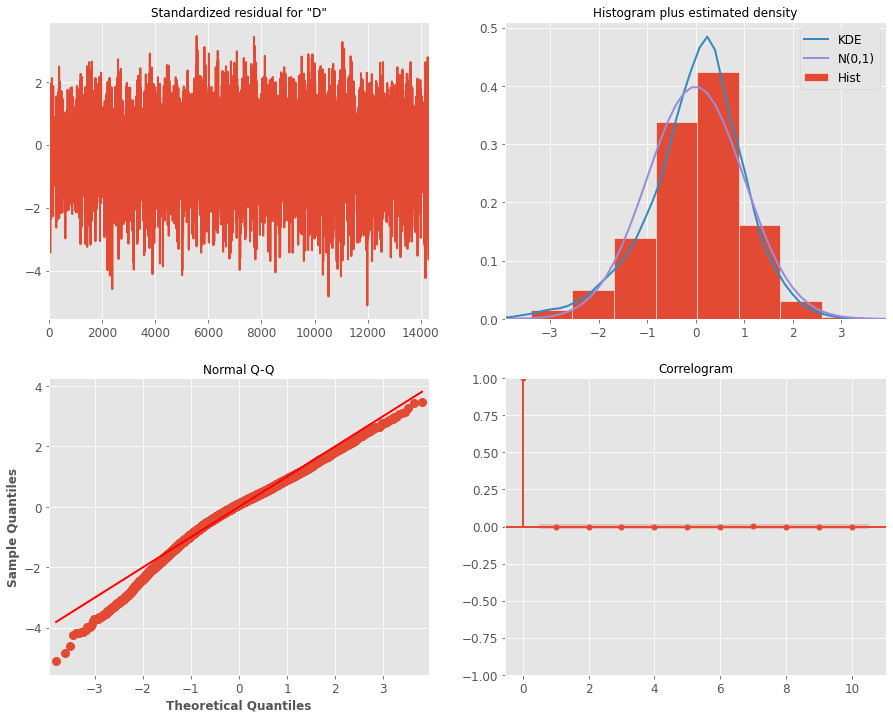

In [45]:
best_model_0.plot_diagnostics(figsize=(15,12))
plt.show()

### (5, 1, 3) Model

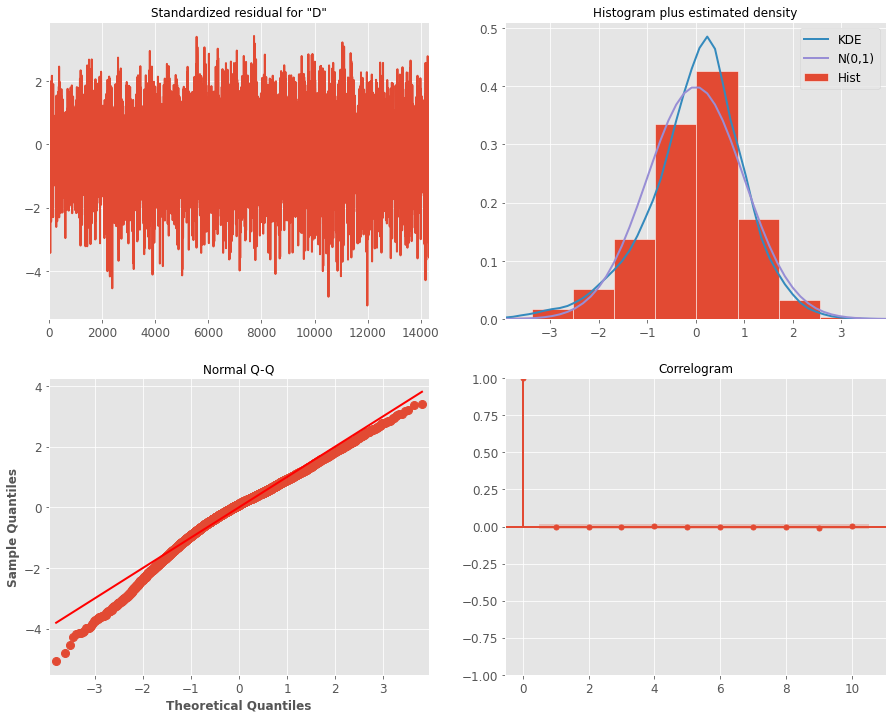

In [46]:
best_model_1.plot_diagnostics(figsize=(15,12))
plt.show()

# Forecasting

In [47]:
fore_l= test_size-1
forecast = best_model_0.get_prediction(start=training_size, end=training_size+fore_l)
forec = forecast.predicted_mean
ci = forecast.conf_int(alpha=0.05) 

In [48]:
#***MATTHEW LOOK HERE -------------------------------*
# in the example I followed, their dataset had an uncertainty measurement in the raw data in each observation
# that is what they used here in the error testing where I've just plugged the data inself back in - data['Deg F']
#What do I doooooooooooo
error_test=data.loc[test_date[1:].index.tolist()]['Deg F']
index_test = test_date[1:].index.tolist()
test_set = test_series[1:]

In [49]:
lower_test = test_set-error_test
upper_test = test_set+error_test

NameError: name 's_forec' is not defined

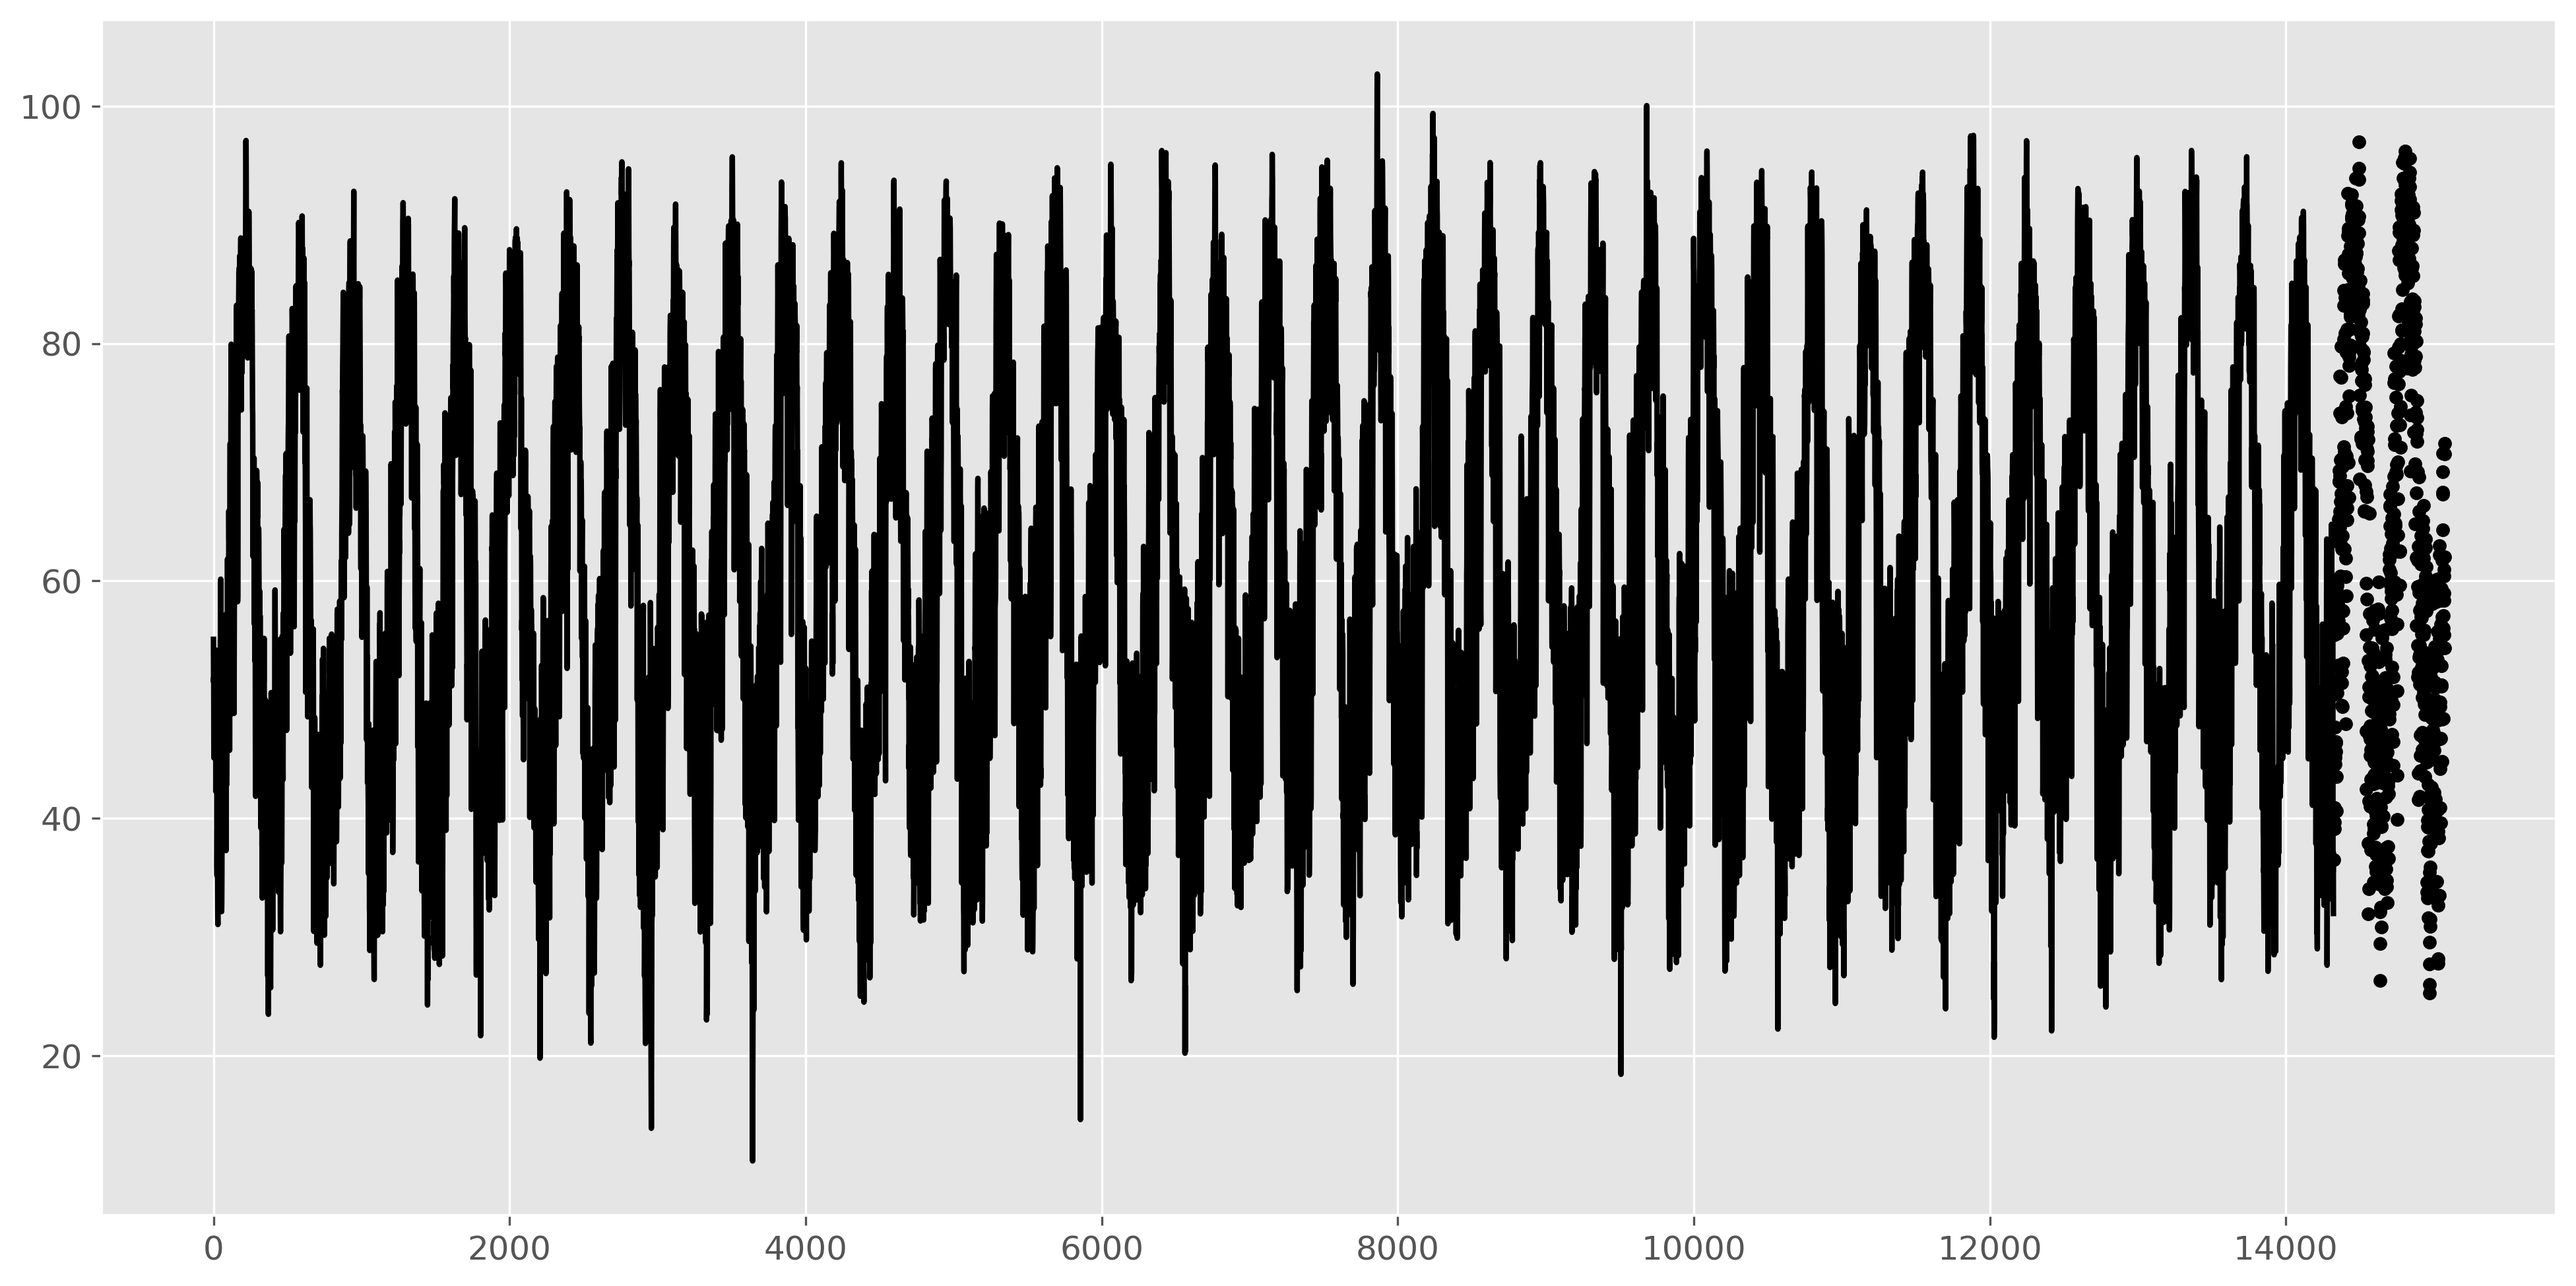

In [50]:
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
x0 = data['Deg F'].index[0:training_size]
x1=data['Deg F'].index[training_size:training_size+fore_l+1]
#ax.fill_between(forec, ci['lower Load'], ci['upper Load'])
plt.plot(x0, data['Deg F'][0:training_size],'k', label = 'Average Temperature')

plt.plot(data['Deg F'][training_size:training_size+fore_l], '.k', label = 'Actual')

#forec = pd.DataFrame(forec, columns=['f'], index = x1)
#forec.f.plot(ax=ax,color = 'Darkorange',label = 'Forecast (d = 2)')
#ax.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')

forec = pd.DataFrame(s_forec, columns=['f'], index = x1)
forec.f.plot(ax=ax,color = 'firebrick',label = 'Forecast  (2,1,5) model')
ax.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')


plt.legend(loc = 'upper left')
plt.xlim(120,265)
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.show()

#Ignore this
plt.fill_between(np.arange(0,len(test_set),1), lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
plot_from_data(test_set,test_date,c='navy',label='Actual')
plot_from_data(forec['f'],test_date,c='firebrick',label='Forecast')
plt.legend(loc=2)